Prepare the environment

In [1]:
import gym
import numpy as np


numBlocks = 2
env = gym.make('BlocksWorld-v0')

env.seed(0)
env.reset()

LEARNING_RATE = 0.1
DISCOUNT_FACTOR = 0.99
EPSILON_START = 0.9
EPSILON_END = 0

done = False
num_episodes = 100

WARN: Environment '<class 'gym.envs.classic_control.blocksworld.BlocksWorldEnv'>' has deprecated methods '_step' and '_reset' rather than 'step' and 'reset'. Compatibility code invoked. Set _gym_disable_underscore_compat = True to disable this behavior.


Create the dictionary that will store the Q values

In [2]:
q_values = {}
#q_values = {'hola': 4}
#print (q_values['hola'])

In [3]:
#Prepare the dictionary keys
#Every key is a string like made from state([1 2]) + action (5) , example "1 2 5"
def get_key_from_arrays (state,action):
    state_str = " ".join(str(x) for x in state)
    action_str = str(action)
    dictionary_key = state_str + " " + action_str
    return (dictionary_key)

state = [1,2]
action = 5
print (get_key_from_arrays(state,action))

1 2 5


In [4]:
#Get and Set methods to read q_values from our dictionary
def get_q_value(state,action):
    dictionary_key = get_key_from_arrays(state,action)
    if (dictionary_key in q_values):
        return (q_values[dictionary_key])
    else:
        return 0

def set_q_value(state,action,value):
    dictionary_key = get_key_from_arrays(state,action)
    q_values[dictionary_key] = value

#state = [1,2]
#action = 5
#
#print (get_q_value(state,action))
#set_q_value(state,action,-8)
#print (get_q_value(state,action))




In [5]:
#Generate all possible actions depending on the number of Blocks
from itertools import product
def get_all_possible_actions_bad(nBlocks):
    d1 = range(0,nBlocks-1)
    d2 = range(0,nBlocks)    
    allActions = product(d1,d2)
    #for x in p:
    #    print (x)
    return (allActions)

def get_all_possible_actions(nBlocks):
    allActions = np.arange(nBlocks*2)
    #for x in p:
    #    print (x)
    return (allActions)



In [6]:
#Generate a list with all possible actions
allActions = get_all_possible_actions(numBlocks)

print (allActions)


[0 1 2 3]


In [7]:
#Check all possible actions and return
#the q-value and the action with the maximum value
def get_maximum_q_value_for_all_possible_actions (state):
    max_value = -1000000.0
    which_action = 0
    for one_action in allActions:    
        val = get_q_value (state,one_action)
        if (val>max_value):
            #print (val)
            #print (max_value)
            max_value = val
            which_action = one_action
    #print ('STATE')
    #print (state)
    #print ('CHOOSING')
    #print (which_action)
    return (max_value,which_action)

#state = (0,1)
#print (get_maximum_q_value_for_all_possible_actions(state))

    

In [8]:
#Time difference update rule of the Q learning algorithm

def calculate_next_q_value (state,action,current_reward, next_state):
    new_q_value = get_q_value (state,action) + \
        LEARNING_RATE*(current_reward + \
        DISCOUNT_FACTOR*(get_maximum_q_value_for_all_possible_actions(next_state)[0]) - get_q_value(state,action))
    converged = get_q_value (state,action)-new_q_value
    set_q_value(state,action,new_q_value)
    return (converged)

In [9]:
#Select either the best action or randomly according
#to epsilon parameter
import random
def choose_next_action_epsilon_greedy(state,epsilon):    
    best_action = get_maximum_q_value_for_all_possible_actions(state)[1]
    #random_action = [random.randint(0,numBlocks-1),random.randint(0,numBlocks)]
    random_action = random.randint(0,2*numBlocks-1)
    BEST = 0
    RANDOM = 1
    next_action_boolean = np.random.choice([BEST, RANDOM],1,  p=[1-epsilon,epsilon])
    if (next_action_boolean == BEST):
        return (best_action)
    else:
        return (random_action)
#print (choose_next_action_epsilon_greedy(EPSILON_START))

In [10]:
#Run episodes until convergence
ep_lengths = []
updates = []
ep_index =[]
n = 0
while (n<num_episodes):    
    steps =1
    done = False
    current_state = env.reset()
    print (n)
    which_epsilon = EPSILON_START*(1- (n/num_episodes))
    #print (which_epsilon)
    while (done == False):
        #print (q_values)        
        next_action = choose_next_action_epsilon_greedy(current_state,which_epsilon)
        #print (next_action)
        obs, reward, done, empty = env.step (next_action)
        ret = calculate_next_q_value(current_state,next_action,reward,obs)
        updates.append(ret)
        ep_index.append(n)
        current_state = obs
        #print ('Next action ' + str(next_action))
        #print ('Obs ' + str(obs))
        #env.render()
        steps +=1    
    #print (done)
    print ("Episode completed, steps:" + str(steps))
    print ('New episode')
    ep_lengths.append(steps)
    n+=1

print ("Average episode length " + str(sum(ep_lengths) / float(len(ep_lengths))))


0

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:6
New episode
1

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
2

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:3
New episode
3
Episode completed, steps:20001
New episode
4

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:4
New episode
5
Episode completed, steps:20001
New episode
6
Episode completed, steps:20001
New episode
7

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:8
New episode
8
Episode completed, steps:20001
New episode
9
Episode completed, steps:20001
New episode
10

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
11
Episode completed, steps:20001
New episode
12

*************** PROBLEM SOLVED!!!!!!!!!!!! **********
Episode completed, steps:5
New episode
13

*************** PROBLEM SOLVED!!!!!!!!!!!! ********

In [11]:
print (q_values)

{'0 1 2 0 0': -0.19, '0 1 2 0 2': -0.18734392900000002, '0 1 2 0 3': 0.48660048013307816, '0 0 2 0 2': 0.9282102012308148, '0 1 0 0 0': -0.29292490000000004, '0 1 0 0 3': 0.6513215599000001, '2 0 0 0 2': -0.32375201811206317, '2 0 0 0 0': 0.8332281830033343, '2 0 0 1 0': 0.0, '0 0 0 1 0': -0.9999999999999996, '0 0 0 1 2': 0.0, '2 0 0 1 1': -0.9999999999999996, '2 0 0 1 3': -0.9999999999999996, '0 0 0 1 3': -0.9999999999999996, '0 0 0 1 1': -0.9999999999999996, '2 0 0 1 2': -0.9999999999999996, '2 0 0 0 1': -0.28702605330245706, '0 0 2 0 0': -0.30094390000000004, '0 0 2 0 3': -0.25368762693132557, '2 0 0 0 3': -0.23023015423300003, '0 1 0 0 2': -0.185952169, '0 1 2 0 1': -0.16726193267174022, '0 0 2 0 1': -0.05978302181663669}


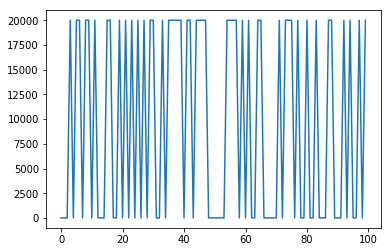

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(ep_lengths)

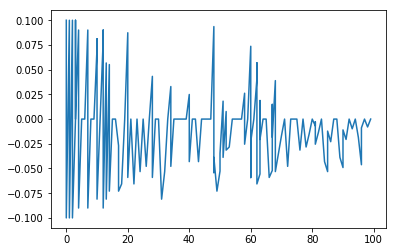

In [13]:
plt.plot(ep_index,updates)